## Import Libraries

In [ ]:
import numpy as np
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
!pip install torchsummary
from torchsummary import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install torchinfo
import torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/ERA_V1/Session7/Assignment/to_submit/

/content/drive/MyDrive/ERA_V1/Session7/Assignment/to_submit


## Data Transformations

We first start with defining our data transformations.

In [ ]:
# Train Phase transformations
train_transforms_5 = transforms.Compose([
                                       transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
                                       transforms.Resize((28, 28)),
                                       transforms.RandomRotation((-10.0, 10.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms_5 = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

## Dataset and Creating Train/Test Split

In [ ]:
train_5 = datasets.MNIST('./data', train=True, download=True, transform=train_transforms_5)
test_5 = datasets.MNIST('./data', train=False, download=True, transform=test_transforms_5)

## Dataloader Arguments & Test/Train Dataloaders

In [ ]:
SEED = 11

# Check if CUDA is available
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


In [ ]:
# dataloader arguments - something we'll fetch these from cmdprmt
dataloader_args5 = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if use_cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader_5 = torch.utils.data.DataLoader(train_5, **dataloader_args5)

# test dataloader
test_loader_5 = torch.utils.data.DataLoader(test_5, **dataloader_args5)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

In [ ]:
# Import the custom module "utils"
import utils
# Import specific components from the "utils" module
from utils import display_train_data, display_multiple_images, display_model_stats, show_image_by_index

In [ ]:
images5, labels5 = next(iter(train_loader_5))

print(images5.shape)
print(labels5.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


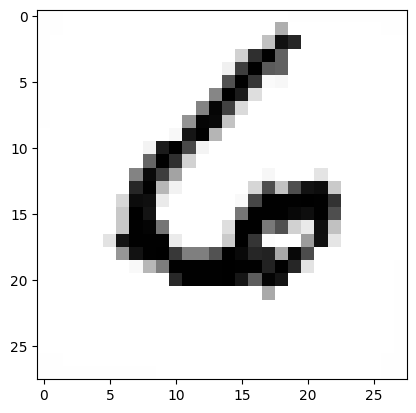

In [ ]:
show_image_by_index(images5, 1)

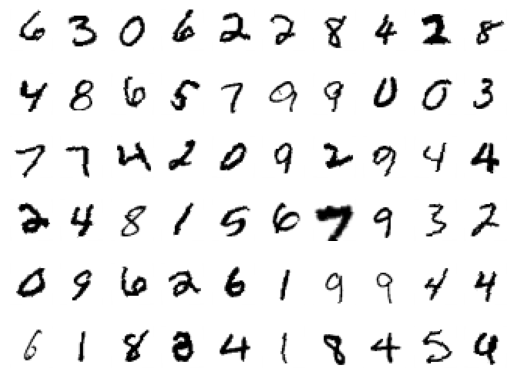

In [ ]:
display_multiple_images(images5, 60)

#### It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

In [ ]:
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [ ]:
# Import "model" module and specific components from the "model" module
import model
from model import Model_9, train, test, get_epoch_test_loss

### Model-5 - Regularized Model + Image Augmentation (Rotation + Center Crop)

In [ ]:
model10 = Model_9().to(device)
summary(model10, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             160
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 14, 10, 10]           1,260
             ReLU-12           [-1, 14, 10, 10]               0
      BatchNorm2d-13           [-1, 14, 10, 10]              28
          Dropout-14           [-1, 14,

In [ ]:
optimizer10 = optim.SGD(model10.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss10, train_acc10 = train(model10, device, train_loader_5, optimizer10, epoch)
    test_loss10, test_acc10 = test(model10, device, test_loader_5)

EPOCH: 0


Loss=0.09114459156990051 Batch_id=468 Accuracy=86.62: 100%|██████████| 469/469 [00:30<00:00, 15.48it/s]



Test set: Average loss: 0.0800, Accuracy: 9781/10000 (97.81%)

EPOCH: 1


Loss=0.1033012866973877 Batch_id=468 Accuracy=97.08: 100%|██████████| 469/469 [00:29<00:00, 15.95it/s]



Test set: Average loss: 0.0441, Accuracy: 9879/10000 (98.79%)

EPOCH: 2


Loss=0.010742423124611378 Batch_id=468 Accuracy=97.73: 100%|██████████| 469/469 [00:29<00:00, 15.94it/s]



Test set: Average loss: 0.0499, Accuracy: 9844/10000 (98.44%)

EPOCH: 3


Loss=0.18317164480686188 Batch_id=468 Accuracy=97.99: 100%|██████████| 469/469 [00:29<00:00, 15.97it/s]



Test set: Average loss: 0.0397, Accuracy: 9874/10000 (98.74%)

EPOCH: 4


Loss=0.04510029777884483 Batch_id=468 Accuracy=98.25: 100%|██████████| 469/469 [00:31<00:00, 14.73it/s]



Test set: Average loss: 0.0293, Accuracy: 9918/10000 (99.18%)

EPOCH: 5


Loss=0.09709829837083817 Batch_id=468 Accuracy=98.33: 100%|██████████| 469/469 [00:29<00:00, 15.82it/s]



Test set: Average loss: 0.0262, Accuracy: 9915/10000 (99.15%)

EPOCH: 6


Loss=0.05674496665596962 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:29<00:00, 15.73it/s]



Test set: Average loss: 0.0251, Accuracy: 9922/10000 (99.22%)

EPOCH: 7


Loss=0.008738749660551548 Batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:29<00:00, 15.71it/s]



Test set: Average loss: 0.0233, Accuracy: 9923/10000 (99.23%)

EPOCH: 8


Loss=0.1897127479314804 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:31<00:00, 14.89it/s]



Test set: Average loss: 0.0256, Accuracy: 9920/10000 (99.20%)

EPOCH: 9


Loss=0.008629197254776955 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:29<00:00, 15.82it/s]



Test set: Average loss: 0.0219, Accuracy: 9934/10000 (99.34%)

EPOCH: 10


Loss=0.027027063071727753 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:30<00:00, 15.56it/s]



Test set: Average loss: 0.0242, Accuracy: 9922/10000 (99.22%)

EPOCH: 11


Loss=0.09138832241296768 Batch_id=468 Accuracy=98.72: 100%|██████████| 469/469 [00:29<00:00, 15.74it/s]



Test set: Average loss: 0.0206, Accuracy: 9935/10000 (99.35%)

EPOCH: 12


Loss=0.027913102880120277 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:29<00:00, 15.70it/s]



Test set: Average loss: 0.0221, Accuracy: 9933/10000 (99.33%)

EPOCH: 13


Loss=0.06957437843084335 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:33<00:00, 14.21it/s]



Test set: Average loss: 0.0201, Accuracy: 9936/10000 (99.36%)

EPOCH: 14


Loss=0.011329391039907932 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:30<00:00, 15.43it/s]



Test set: Average loss: 0.0210, Accuracy: 9932/10000 (99.32%)



In [ ]:
train_losses10 = [t.cpu().item() for t in train_loss10]

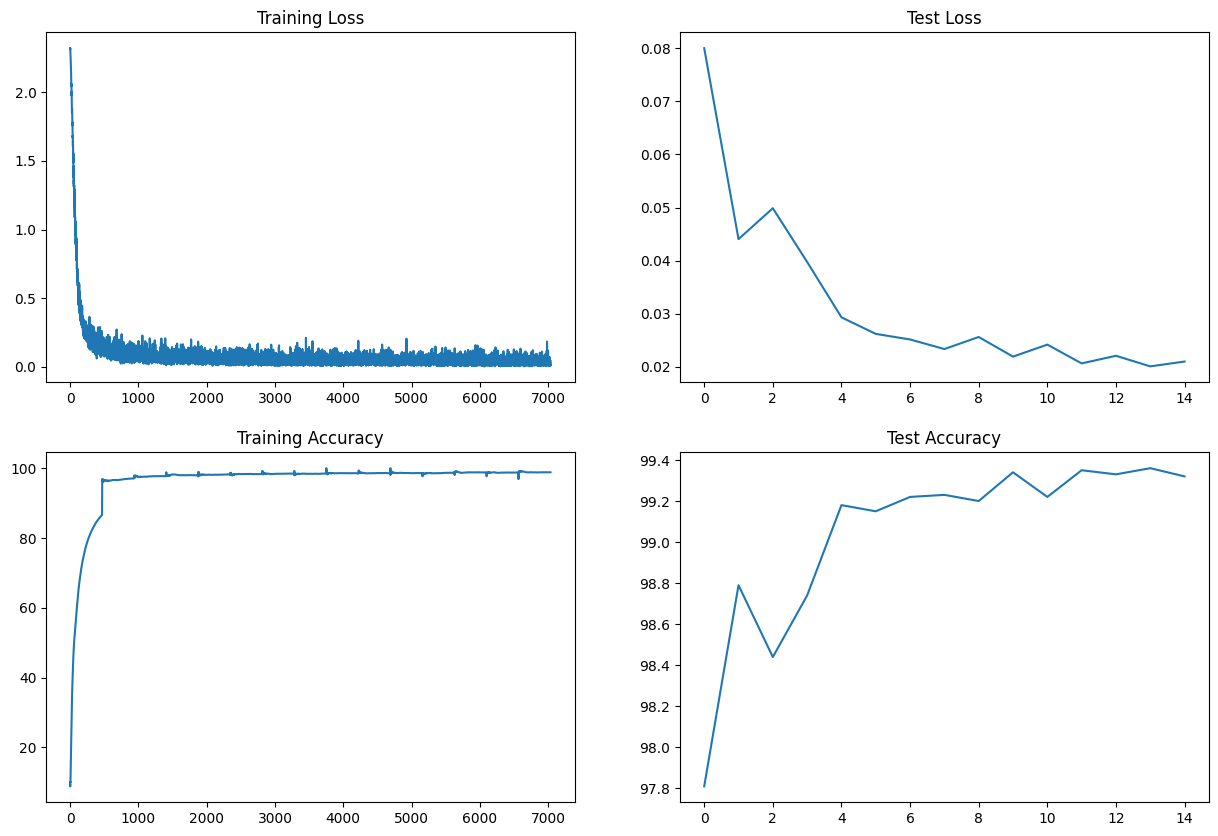

In [ ]:
display_model_stats(train_losses10, train_acc10, test_loss10, test_acc10)

### Model-6 - Regularized Model + Image Augmentation (Rotation + Center Crop) + Adaptive Learning Rate

In [ ]:
model11 = Model_9().to(device)
summary(model11, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             160
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 14, 10, 10]           1,260
             ReLU-12           [-1, 14, 10, 10]               0
      BatchNorm2d-13           [-1, 14, 10, 10]              28
          Dropout-14           [-1, 14,

In [ ]:
optimizer11 = optim.SGD(model11.parameters(), lr=0.1, momentum=0.9)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer11, mode='min',
                                                       factor=0.1, patience=3,
                                                       threshold=0.0001, threshold_mode='rel',
                                                       cooldown=0, min_lr=0, eps=1e-08, verbose=False)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss11, train_acc11 = train(model11, device, train_loader_5, optimizer11, epoch)
    test_loss11, test_acc11 = test(model11, device, test_loader_5)
    scheduler.step(get_epoch_test_loss())

EPOCH: 0


  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Loss=0.10166391730308533 Batch_id=468 Accuracy=91.70: 100%|██████████| 469/469 [00:30<00:00, 15.44it/s]



Test set: Average loss: 0.0521, Accuracy: 9840/10000 (98.40%)

EPOCH: 1


Loss=0.03163221850991249 Batch_id=468 Accuracy=97.40: 100%|██████████| 469/469 [00:31<00:00, 15.12it/s]



Test set: Average loss: 0.0463, Accuracy: 9849/10000 (98.49%)

EPOCH: 2


Loss=0.044468462467193604 Batch_id=468 Accuracy=97.86: 100%|██████████| 469/469 [00:30<00:00, 15.28it/s]



Test set: Average loss: 0.0338, Accuracy: 9893/10000 (98.93%)

EPOCH: 3


Loss=0.1371394395828247 Batch_id=468 Accuracy=98.09: 100%|██████████| 469/469 [00:32<00:00, 14.31it/s]



Test set: Average loss: 0.0273, Accuracy: 9918/10000 (99.18%)

EPOCH: 4


Loss=0.016508741304278374 Batch_id=468 Accuracy=98.23: 100%|██████████| 469/469 [00:30<00:00, 15.55it/s]



Test set: Average loss: 0.0318, Accuracy: 9904/10000 (99.04%)

EPOCH: 5


Loss=0.018044598400592804 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:30<00:00, 15.40it/s]



Test set: Average loss: 0.0217, Accuracy: 9936/10000 (99.36%)

EPOCH: 6


Loss=0.0750996395945549 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:30<00:00, 15.37it/s]



Test set: Average loss: 0.0212, Accuracy: 9940/10000 (99.40%)

EPOCH: 7


Loss=0.05137046054005623 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:32<00:00, 14.34it/s]



Test set: Average loss: 0.0209, Accuracy: 9938/10000 (99.38%)

EPOCH: 8


Loss=0.04354186728596687 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:30<00:00, 15.34it/s]



Test set: Average loss: 0.0201, Accuracy: 9942/10000 (99.42%)

EPOCH: 9


Loss=0.022837147116661072 Batch_id=468 Accuracy=98.82: 100%|██████████| 469/469 [00:30<00:00, 15.51it/s]



Test set: Average loss: 0.0202, Accuracy: 9942/10000 (99.42%)

EPOCH: 10


Loss=0.012035866267979145 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:30<00:00, 15.47it/s]



Test set: Average loss: 0.0202, Accuracy: 9942/10000 (99.42%)

EPOCH: 11


Loss=0.017940646037459373 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:30<00:00, 15.54it/s]



Test set: Average loss: 0.0198, Accuracy: 9945/10000 (99.45%)

EPOCH: 12


Loss=0.007085271179676056 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:32<00:00, 14.52it/s]



Test set: Average loss: 0.0199, Accuracy: 9944/10000 (99.44%)

EPOCH: 13


Loss=0.01655418612062931 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:30<00:00, 15.49it/s]



Test set: Average loss: 0.0199, Accuracy: 9942/10000 (99.42%)

EPOCH: 14


Loss=0.03265482559800148 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:30<00:00, 15.38it/s]



Test set: Average loss: 0.0205, Accuracy: 9943/10000 (99.43%)



In [ ]:
train_losses11 = [t.cpu().item() for t in train_loss11]

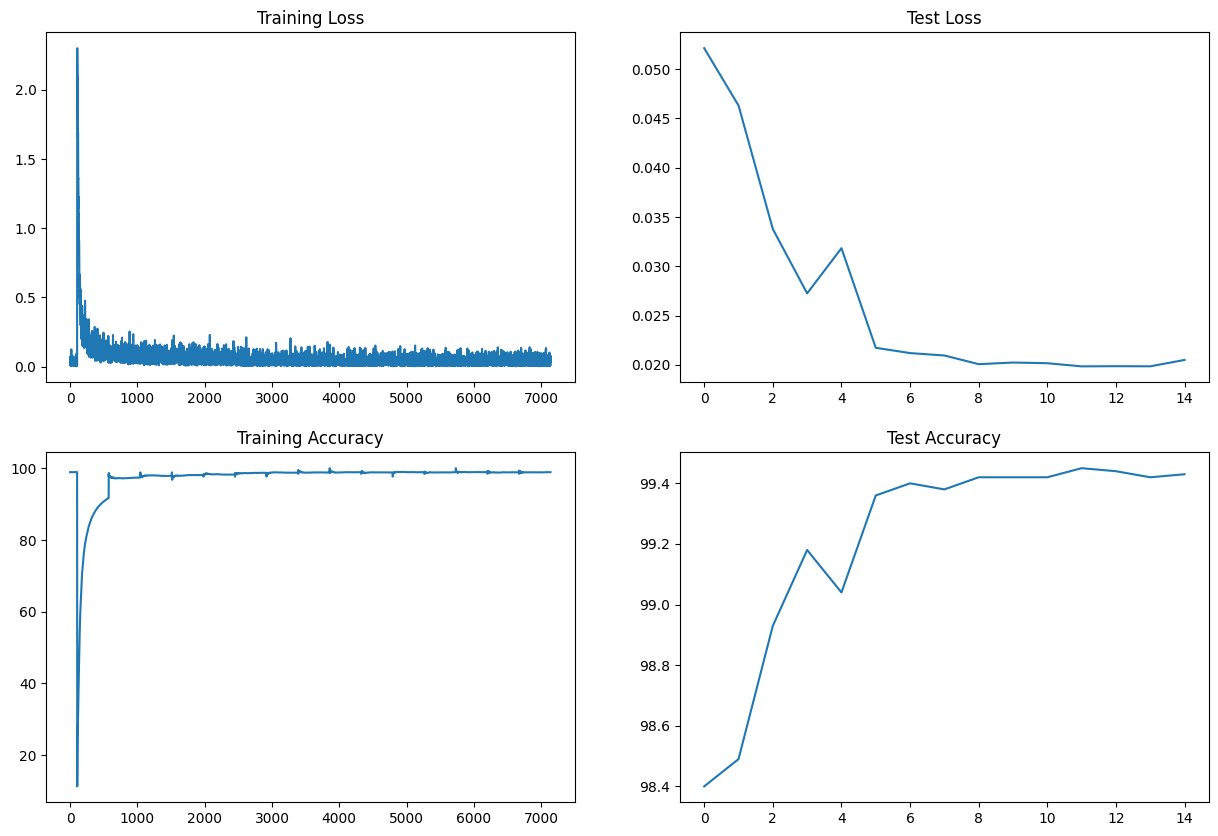

In [ ]:
display_model_stats(train_losses11, train_acc11, test_loss11, test_acc11)

#### Code Block - Model + Image Augmentation

**Target:**

- Crop the image at the center and re-size
- Add rotation of 10 degrees, guessing that this should be sufficient.

**Results:**

- Parameters: 7.280K
- Best Train Accuracy: 98.83
- Best Test Accuracy: 99.36 (13th Epoch)

**Analysis:**

- The model is under-fitting now. This is fine, as we know we have made our train data harder.
- The test accuracy is also up, which means our test data had few images which had transformation difference w.r.t. train dataset


#### Code Block - Model + Image Augmentation + Adaptive Learning

**Target:**

- Add ReduceLROnPlateau Scheduler

**Results:**

- Parameters: 7.280K
- Best Train Accuracy: 98.89%
- Best Test Accuracy: 99.45% (11th Epoch)

**Analysis:**
- Finding a good LR schedule is hard. Hence we made the model identify the Plateau and then apply the changes in LR.
- It did help in getting to 99.4 faster, but the final accuracy is not more than 99.45